# Mini Project

Take any dataset(s) of your choice and compare the different visual elements in Python using Matplotlib, Seaborn and Plotly Express.

The Final Submission will be a GitHub link for example: https://github.com/kanchanchy/Data-Visualization-in-Python



In [ ]:
#Let's use the Iris dataset to carry this out
#URL: "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [2]:
#Importing necessary libraries
import pandas as pd               # For data manipulation
import numpy as np                # For mathematical operations
import matplotlib.pyplot as plt   # For Matplotlib visualizations
import seaborn as sns             # For Seaborn visualizations
import plotly.express as px       # For Plotly Express visualizations



In [7]:
#Importing the Iris Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv(url, header=None, names=columns)

In [10]:
#Let's check some important features of our dataset to determine if and how we need to clean it up before proceeding with the visualizations

#Printing the head of the df.
print("First five rows of the dataframe:")
print(df.head())

#Determining the number of rows and columns:
print("\nNumber of rows and columns in the dataframe:")
print(df.shape)

#Checking other info about the dataset
print(df.info())

print(df.describe())

First five rows of the dataframe:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Number of rows and columns in the dataframe:
(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  p

From the results above, we can see that the **dataset is clean,** hence we can proceed with the visualizations

In [11]:
assert df.isnull().sum().sum() == 0  #Just to re-confirm that there are no null values

Proceeding in creating the visualizations using the three libraries: **Matplotlib, Seaborn, and Plotly**

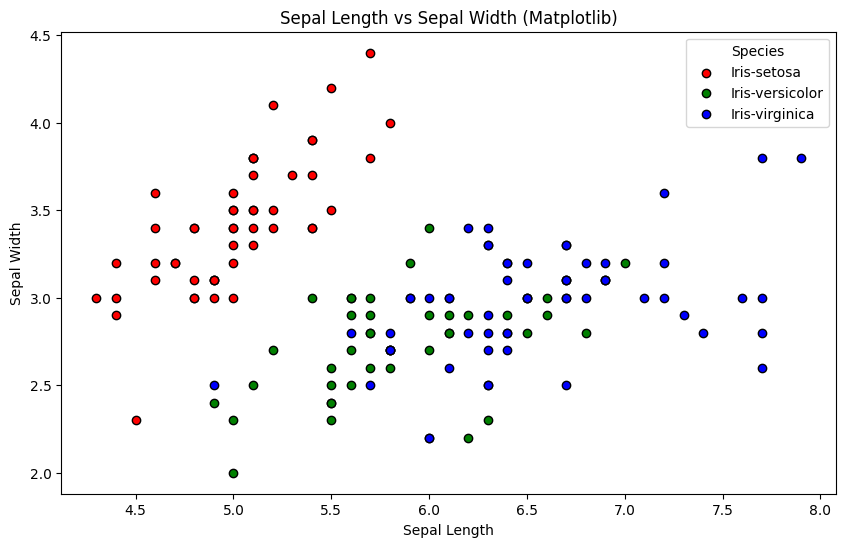

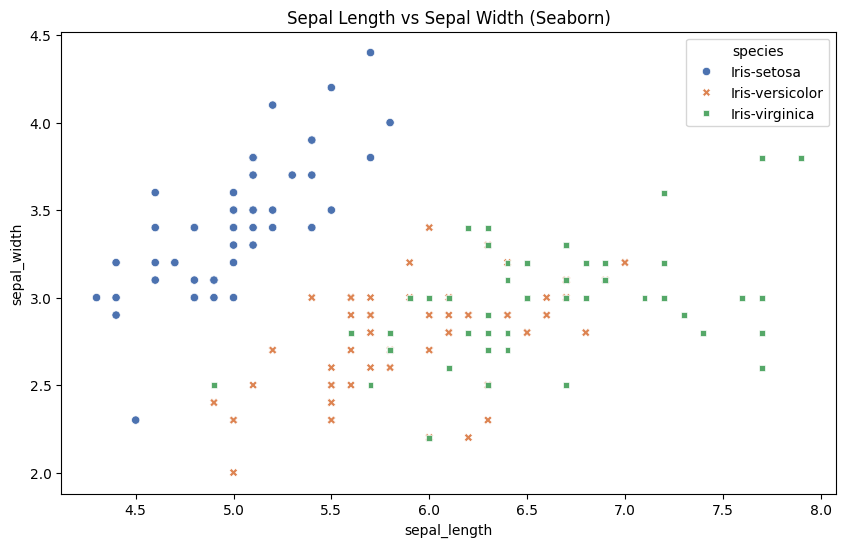

In [16]:
#Scatter Plot - Sepal Width against Sepal Length


# Matplotlib Scatter Plot

# Define colors for each species
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'],
                color=colors[species], label=species, edgecolor='k')


plt.title('Sepal Length vs Sepal Width (Matplotlib)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species')
plt.show()

# Seaborn Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', style='species', palette='deep')
plt.title('Sepal Length vs Sepal Width (Seaborn)')
plt.show()

# Plotly Express Scatter Plot
fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species', title='Sepal Length vs Sepal Width (Plotly Express)')
fig.show()

From the scatter plots above, it is very clear that the Plotly is the most visually appealling and the only interactive plot.

Also, the Matplotlib required series of lines of code (including a "for" loop iterator) to visualize the scatter plot of the three categories, hence making it the most cubersome of the three plots

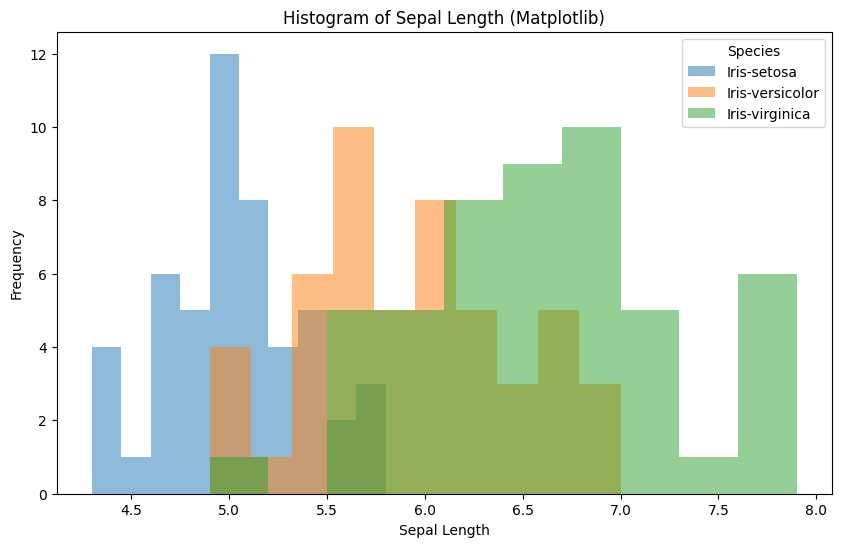

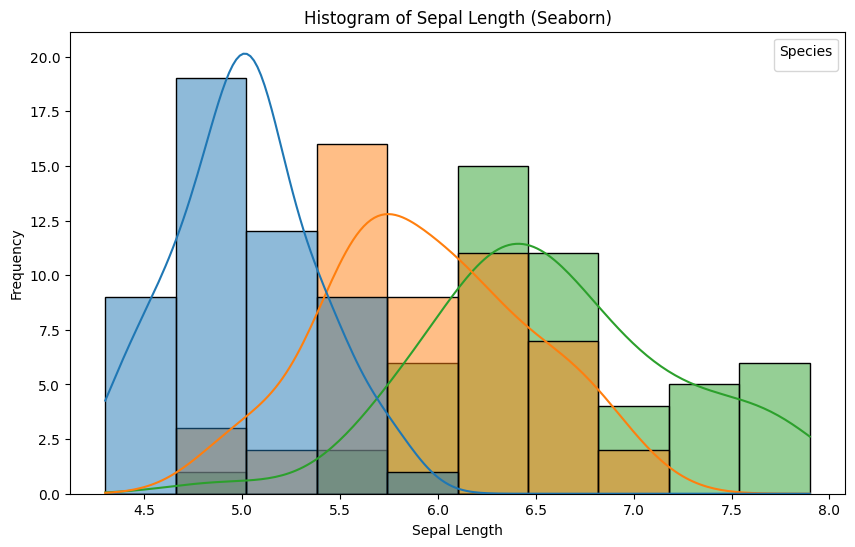

In [17]:
#Histogram Plots of Sepal Length

#Matplotlib Histogram
plt.figure(figsize=(10, 6))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.hist(subset['sepal_length'], bins=10, alpha=0.5, label=species)

plt.title('Histogram of Sepal Length (Matplotlib)')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()

#Seaborn Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='sepal_length', hue='species', bins=10, kde=True, alpha=0.5)

plt.title('Histogram of Sepal Length (Seaborn)')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()

#Plotly Histogram
fig = px.histogram(df, x='sepal_length', color='species', title='Histogram of Sepal Length (Plotly Express)',
                   barmode='overlay', histnorm='probability density')
fig.update_layout(xaxis_title='Sepal Length', yaxis_title='Frequency')
fig.show()

<Figure size 1000x600 with 0 Axes>

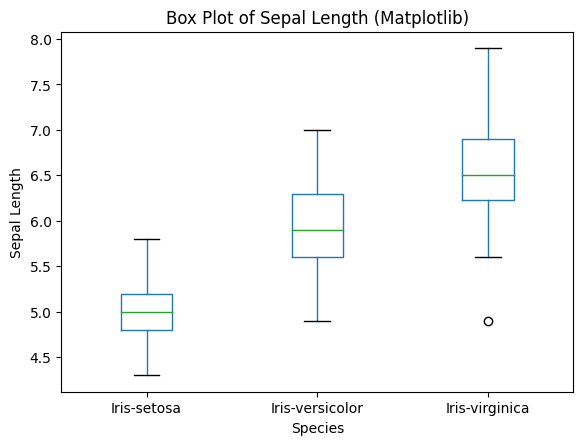

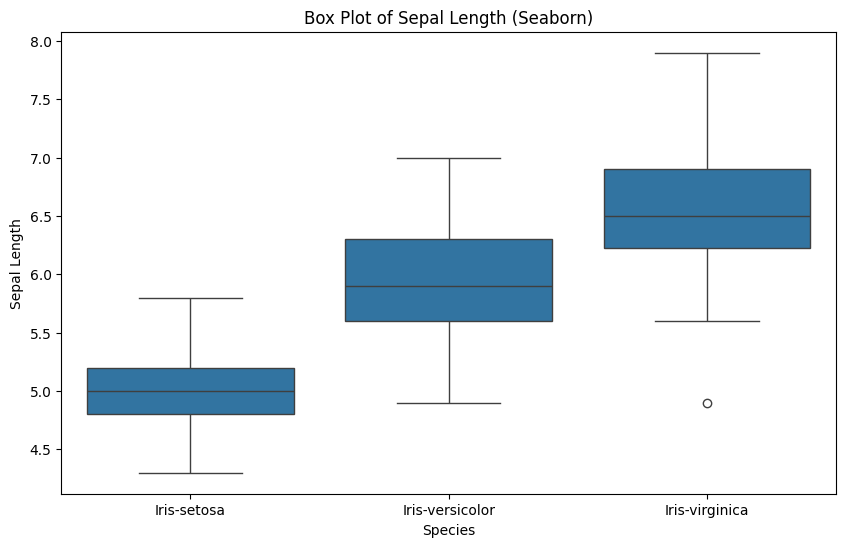

In [23]:
#Box Plot of Sepal Length

#Matplotlib Boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='sepal_length', by='species', grid=False)
plt.title('Box Plot of Sepal Length (Matplotlib)')
plt.suptitle('')  # Used to suppress the default title to clean up the layout
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()


#Seaborn Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='species', y='sepal_length')
plt.title('Box Plot of Sepal Length (Seaborn)')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

#Plotly Boxplot
fig = px.box(df, x='species', y='sepal_length', title='Box Plot of Sepal Length (Plotly Express)',
             points='all')  # Show all points as individual markers
fig.update_layout(xaxis_title='Species', yaxis_title='Sepal Length')
fig.show()


Once again, the plotly gives the most visually appealing and is the only interactive plot among the three. It also shows the distribution of the dataset along each distribution

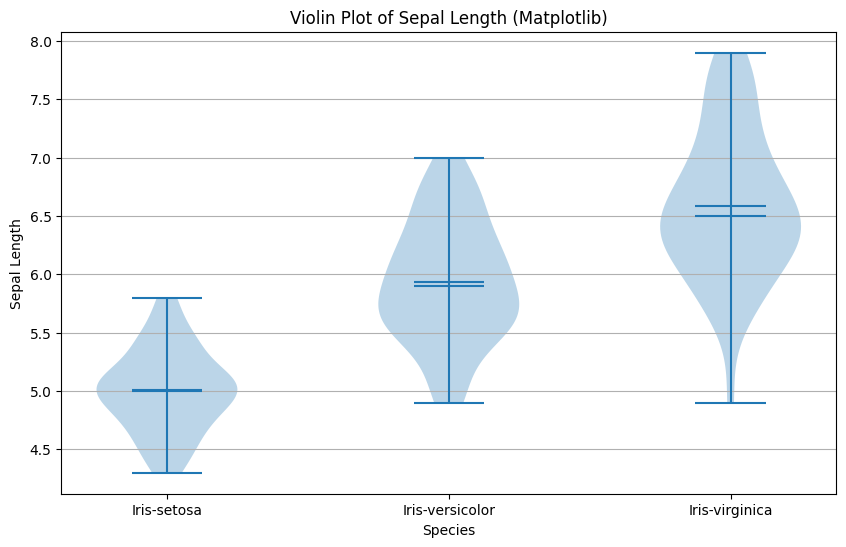

<ipython-input-24-6b9958ddc1af>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




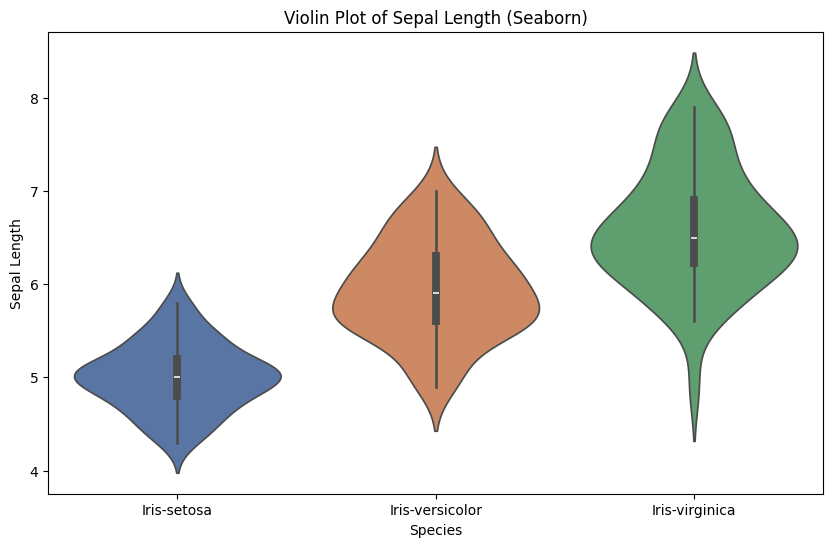

In [24]:
#Violin Plot

#Matplotlib Violin Plot
# Prepare data for violin plot
species = df['species'].unique()
data = [df[df['species'] == s]['sepal_length'] for s in species]

# Creating the violin plot
plt.figure(figsize=(10, 6))
plt.violinplot(data, showmeans=True, showmedians=True)

# Customizing the plot
plt.title('Violin Plot of Sepal Length (Matplotlib)')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.xticks(ticks=[1, 2, 3], labels=species)  # Set x-tick labels
plt.grid(axis='y')
plt.show()

#Seaborn Violin Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='species', y='sepal_length', palette='deep')
plt.title('Violin Plot of Sepal Length (Seaborn)')
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.show()

#Plotly Violin Plot
fig = px.violin(df, x='species', y='sepal_length', box=True, points='all', title='Violin Plot of Sepal Length (Plotly Express)')
fig.update_layout(xaxis_title='Species', yaxis_title='Sepal Length')
fig.show()

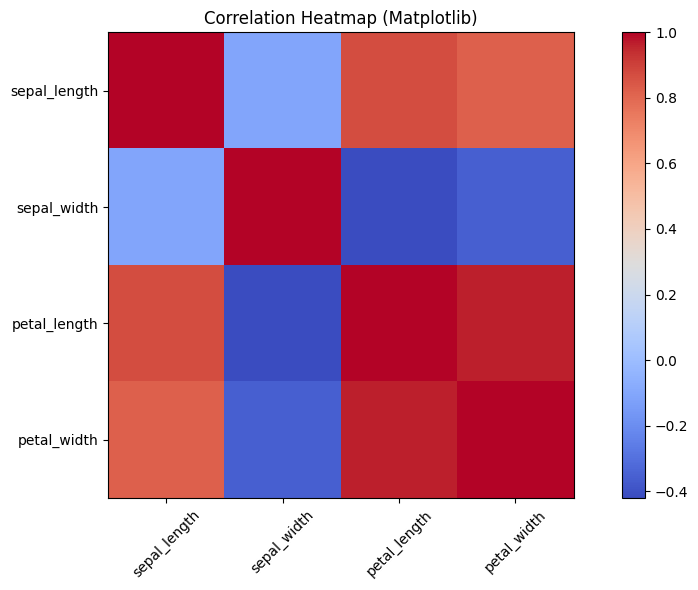

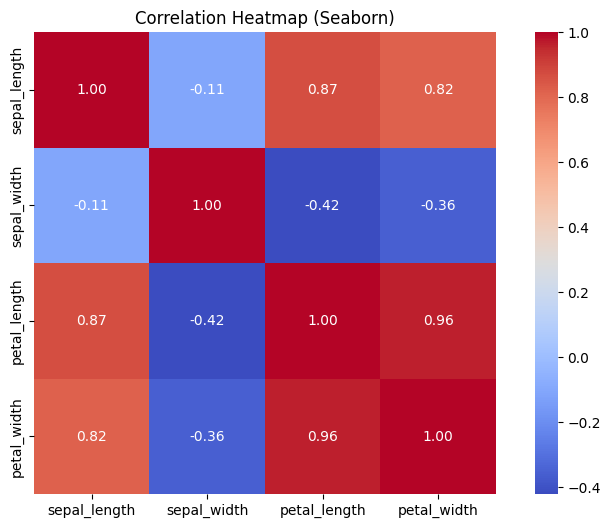

In [27]:
#Heatmap of Correlation Matrix

#Matplotlib Correlation Heatmap
#First, compute the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr() # Select only numerical columns

# Create the heatmap
plt.figure(figsize=(10, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Add color bar
plt.colorbar()

# Set ticks and labels
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix.index)), correlation_matrix.index)

# Add title
plt.title('Correlation Heatmap (Matplotlib)')

# Show the plot
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------------------------

#Seaborn Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap (Seaborn)')
plt.show()


# ----------------------------------------------------------------------------------------------
#Plotly Correlation Heatmap
fig = px.imshow(correlation_matrix, title='Correlation Heatmap (Plotly Express)',
                labels=dict(x="Features", y="Features", color="Correlation"),
                x=correlation_matrix.columns, y=correlation_matrix.columns)
fig.show()


For the Heatmap of the Correlation Matrix of the numerical columns of df, the Seaborn plot gives the most comprehensive visual illustration

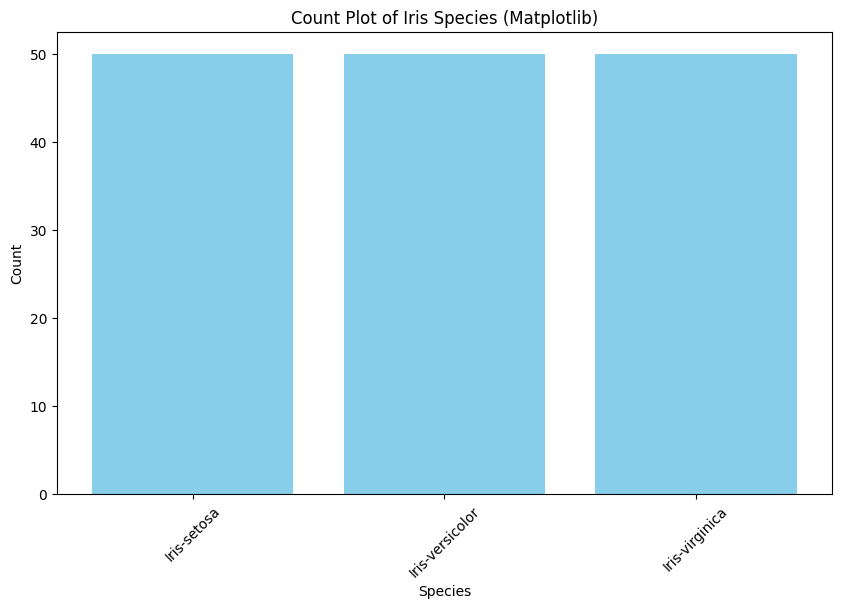

<ipython-input-28-42f3e2faa24d>:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




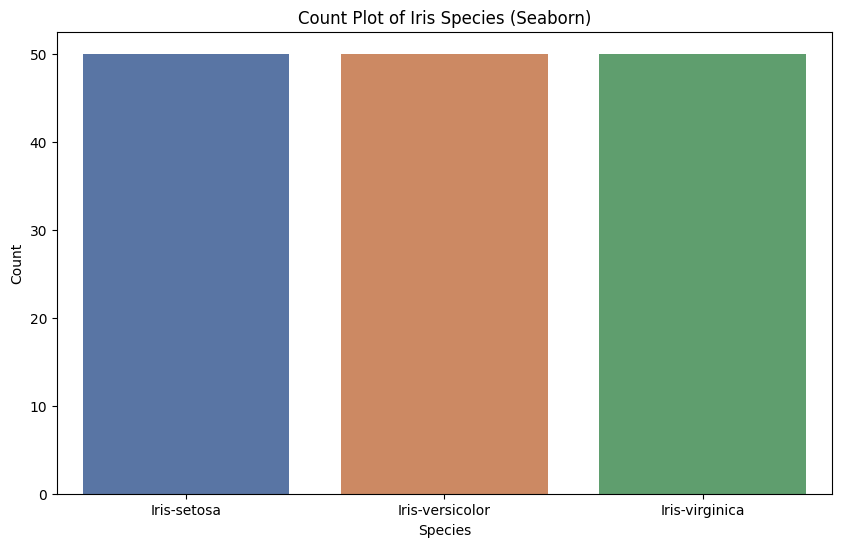

In [28]:
#Count Plot

#Matplotlib Count Plot
# Count the occurrences of each species
species_counts = df['species'].value_counts()

# Create the count plot
plt.figure(figsize=(10, 6))
plt.bar(species_counts.index, species_counts.values, color='skyblue')

# Adding labels and title
plt.title('Count Plot of Iris Species (Matplotlib)')
plt.xlabel('Species')
plt.ylabel('Count')

# Showing the plot
plt.xticks(rotation=45)  # This will rotate the x-axis labels for better readability
plt.show()

# -----------------------------------------------------------------------------
#Seaborn Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='species', palette='deep')
plt.title('Count Plot of Iris Species (Seaborn)')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# -----------------------------------------------------------------------------
#Plotly Count Plot
fig = px.histogram(df, x='species', title='Count Plot of Iris Species (Plotly Express)',
                   color='species', histfunc='count')
fig.update_layout(xaxis_title='Species', yaxis_title='Count')
fig.show()


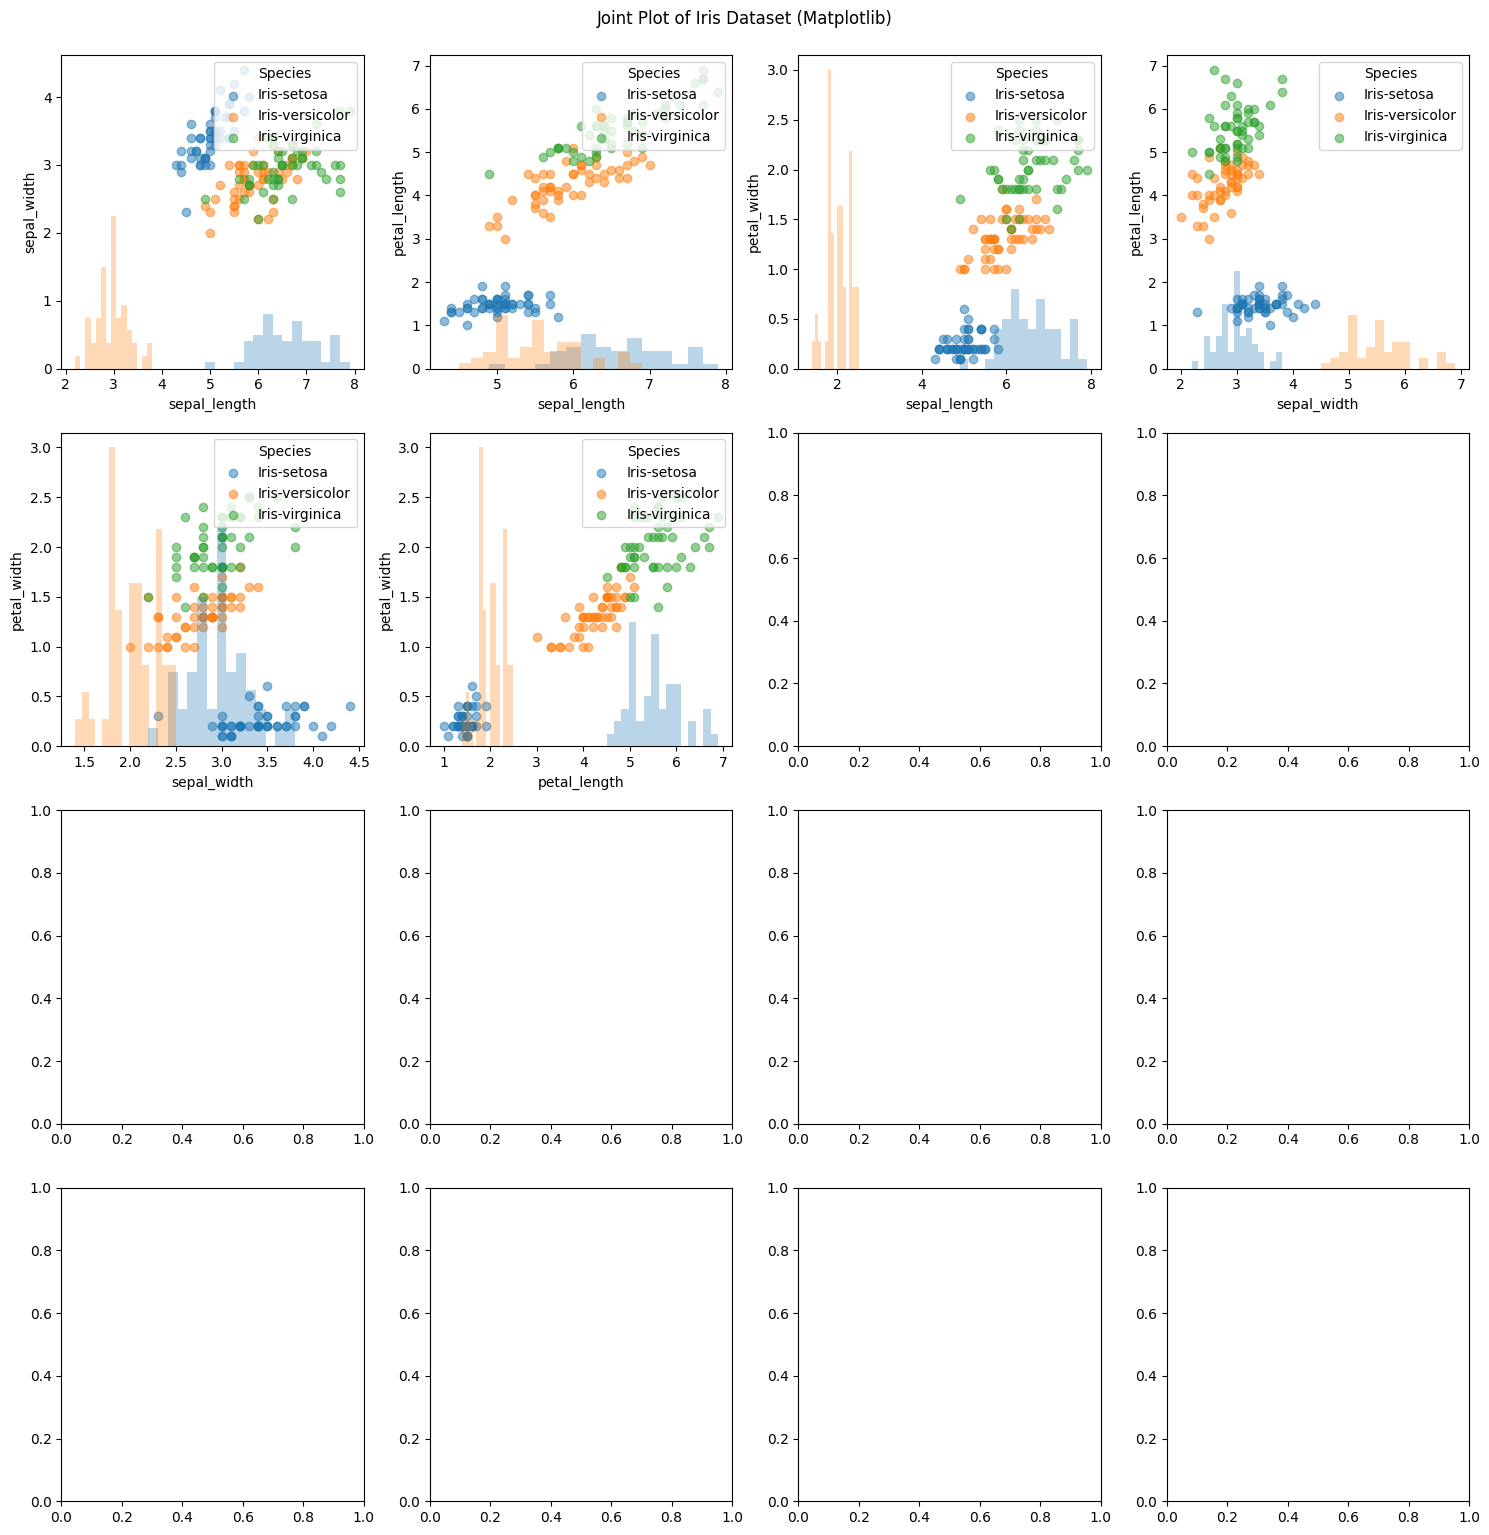

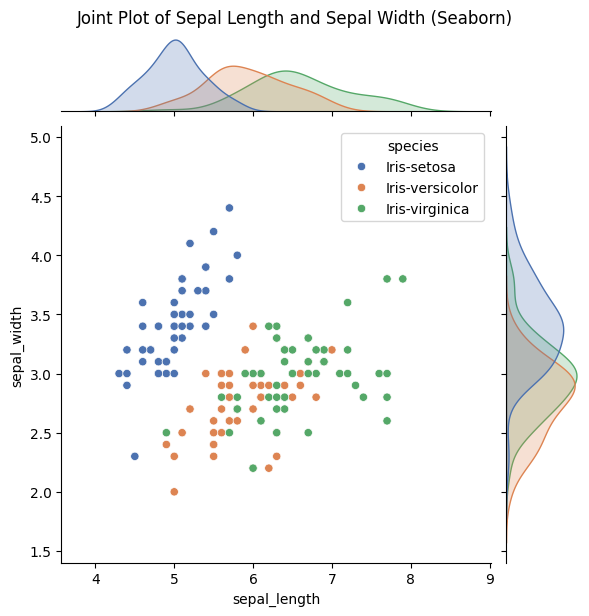

In [30]:
#Pair Wise Joint Plot
#This plot combines scatter and histogram

#Matplotlib Pair Wise Joint Plot
# Define features for the joint plot
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
species = df['species'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(features), ncols=len(features), figsize=(15, 15))

from itertools import combinations
# Loop through pairs of features
for i, (feature1, feature2) in enumerate(combinations(features, 2)):
    # Create scatter plot for the pair
    for s in species:
        subset = df[df['species'] == s]
        axes[i//len(features), i%len(features)].scatter(subset[feature1], subset[feature2], label=s, alpha=0.5)

    # Create histograms for the features on the diagonal
    axes[i//len(features), i%len(features)].set_xlabel(feature1)
    axes[i//len(features), i%len(features)].set_ylabel(feature2)
    axes[i//len(features), i%len(features)].legend(title='Species', loc='upper right')

    # Create histograms for the marginal distributions
    axes[i//len(features), i%len(features)].hist(subset[feature1], bins=15, density=True, alpha=0.3)
    axes[i//len(features), i%len(features)].hist(subset[feature2], bins=15, density=True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Joint Plot of Iris Dataset (Matplotlib)', y=1.02)
plt.show()

# ----------------------------------------------------------------------------
#Seaborn Pair Wise Joint Plot
sns.jointplot(data=df, x='sepal_length', y='sepal_width', hue='species', palette='deep', kind='scatter')
plt.suptitle('Joint Plot of Sepal Length and Sepal Width (Seaborn)', y=1.02)
plt.show()

# -----------------------------------------------------------------------------
#Plotly Pair Wise Joint Plot
fig = px.scatter(df, x='sepal_length', y='sepal_width', color='species', title='Joint Plot of Sepal Length and Sepal Width (Plotly)')
fig.add_trace(px.histogram(df, x='sepal_length', color='species', marginal='rug').data[0])
fig.add_trace(px.histogram(df, y='sepal_width', color='species', marginal='rug').data[0])

#Show the plot
fig.show()

<Figure size 1500x600 with 0 Axes>

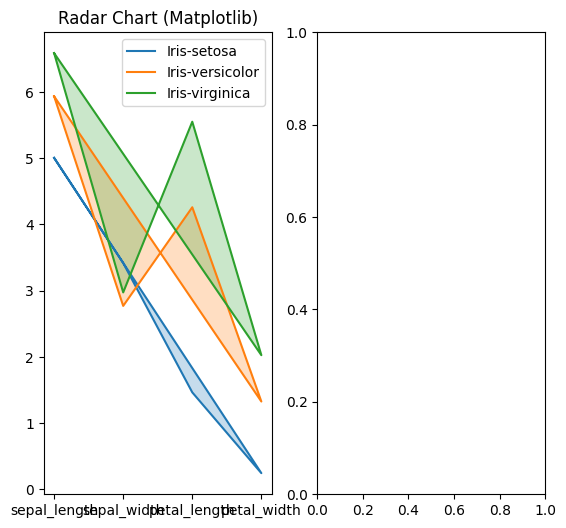

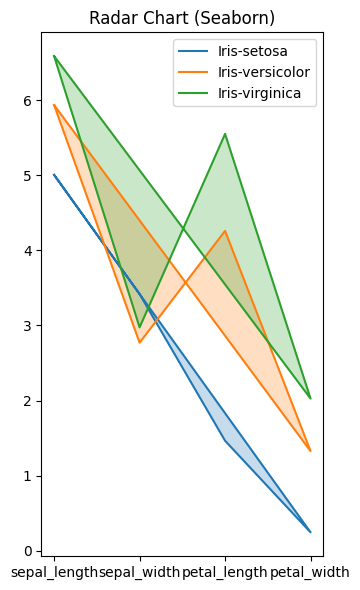

In [34]:
#Radar Chart (Spider Chart)

import plotly.graph_objects as go
# Preparing the data for the radar chart
species = df['species'].unique()
data = df.groupby('species').mean().reset_index()

# Radar Chart using Matplotlib
def plot_radar_matplotlib(data):
    categories = list(data.columns[1:])
    N = len(categories)

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]  # complete the loop

    plt.figure(figsize=(10, 6))

    for i in range(len(data)):
        values = data.loc[i].values[1:].tolist()
        values += values[:1]  # complete the loop

        plt.subplot(1, 3, 1)
        plt.fill(angles, values, alpha=0.25)
        plt.plot(angles, values, label=data.loc[i, 'species'])

    plt.xticks(angles[:-1], categories)
    plt.title('Radar Chart (Matplotlib)')
    plt.legend(loc='upper right')

# Radar Chart using Seaborn (Not natively supported, so using Matplotlib)
def plot_radar_seaborn(data):
    plt.subplot(1, 3, 2)
    plot_radar_matplotlib(data)
    plt.title('Radar Chart (Seaborn)')

# Radar Chart using Plotly
def plot_radar_plotly(data):
    categories = list(data.columns[1:])
    fig = go.Figure()

    for i in range(len(data)):
        values = data.loc[i].values[1:].tolist()
        values += values[:1]  # complete the loop
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill='toself',
            name=data.loc[i, 'species']
        ))

    fig.update_layout(title='Radar Chart (Plotly)', polar=dict(radialaxis=dict(visible=True)), showlegend=True)
    return fig


# Creating subplots for Matplotlib and Seaborn
plt.figure(figsize=(15, 6))
plot_radar_matplotlib(data)
plot_radar_seaborn(data)

# Show Matplotlib Radar Charts
plt.tight_layout()
plt.show()

# Show Plotly Radar Chart
plot_radar_plotly(data).show()
